In [1]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from scipy.misc import imresize
from skimage.data import astronaut
from tensorflow.python.framework import ops

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.style.use('ggplot')

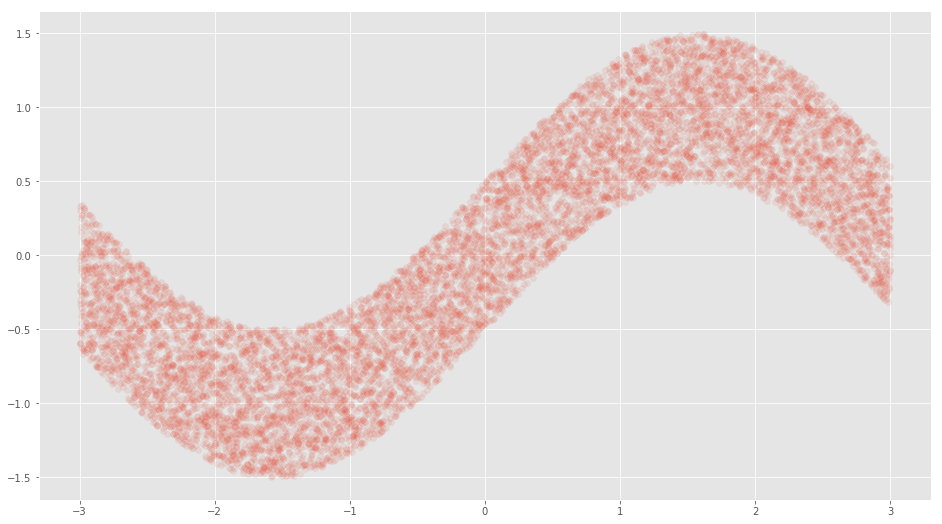

In [2]:
n = 10000
xs = np.linspace(-3, 3, n)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n)
plt.scatter(xs, ys, alpha = 0.1);

In [3]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

W = tf.Variable(
    tf.random_normal([1], dtype = tf.float32, stddev = 0.1), name = 'W')
b = tf.Variable(tf.constant([1], dtype = tf.float32), name = 'b')
preds = X * W + b

In [4]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [5]:
# cost = distance(preds, tf.sin(X)) # approximated by
cost = distance(preds, Y)

In [6]:
# Using a TF optimizer
cost = tf.reduce_mean(distance(preds, Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)\
    .minimize(cost)

In [7]:
n_iterations = 500

In [8]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        s.run(optimizer, feed_dict = { X: xs, Y: ys })
        training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
        
        if it_i % 10 == 0:
            ys_pred = preds.eval(feed_dict = { X: xs }, session = s)
            # If not in notebook:
            #ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations)
            #fig.show()
            #plt.draw()
                        
            print('Training cost:', training_cost)
            
        # Quit when training improvement meets threshold
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
            
        prev_training_cost = training_cost            

Training cost: 1.0341
Training cost: 0.962068
Training cost: 0.891496
Training cost: 0.822298
Training cost: 0.754809
Training cost: 0.691048
Training cost: 0.634317
Training cost: 0.586015
Training cost: 0.5467
Training cost: 0.515002
Training cost: 0.490531
Training cost: 0.471622
Training cost: 0.456863
Training cost: 0.445412
Training cost: 0.436592
Training cost: 0.429704
Training cost: 0.424305
Training cost: 0.42009
Training cost: 0.416832
Training cost: 0.414453
Training cost: 0.412653
Training cost: 0.411339
Training cost: 0.410354
Training cost: 0.409653
Training cost: 0.409155
Training cost: 0.408787
Training cost: 0.40852
Training cost: 0.408331
Training cost: 0.408205
Training cost: 0.408126
Training cost: 0.408069
Training cost: 0.408028
Training cost: 0.408002
Training cost: 0.407984
Training cost: 0.407971


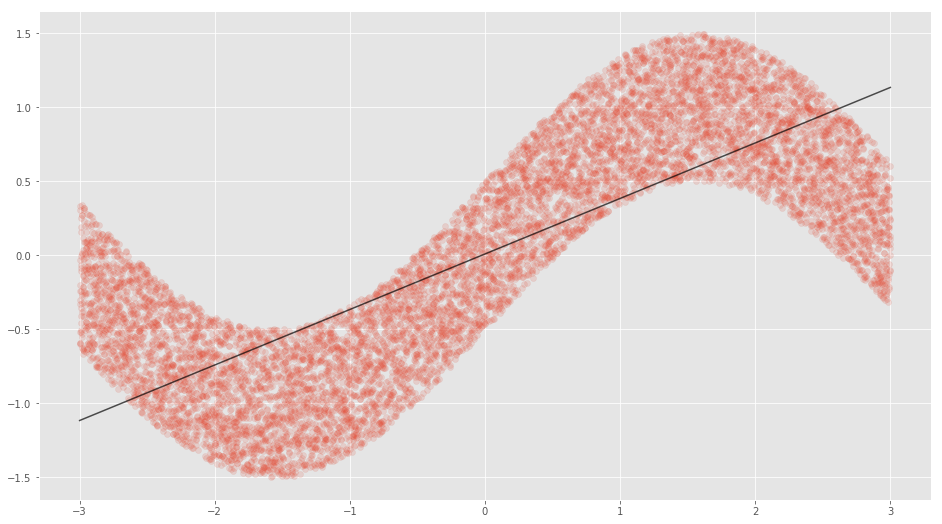

In [9]:
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha = 0.15);
ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations);

## Stochastic and Mini Batch GD

In [10]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size

for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])
    
# BAD IDEA: network will pick up on orderin of data as a signal...
# better to randomize

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [11]:
rand_idxs = np.random.permutation(idxs)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[48 79 84 62 26 56 47 14 21 50]
[61 82 96 80  0 99 18 67 69 34]
[77 88 63 70 60 98 11 52 91 85]
[16  6 42 95 33  7  1 44 13 45]
[72 35 22 93 75 68 20 53 97 41]
[17 23 87 30 76 58 27 15 90 81]
[37 55 12  2 40  8 49 74 86 54]
[ 9 38 59 43 39 73 36 57 51 25]
[78  5 83 19 46 32 65 28 71 24]
[66 89 94 29 31 64  4  3 92 10]


In [12]:
# Incorporate mini-batching into previous:
batch_size = 1000
#fig, ax = plt.subplots(1, 1)
#ax.scatter(xs, ys, alpha=0.15, marker='+')
#ax.set_xlim([-4, 4])
#ax.set_ylim([-2, 2])

with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or 
    # tf.constant_intitializer, then this would have set `W` and `b` to 
    # their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={ X: xs[idxs_i], Y: ys[idxs_i] })

        training_cost = sess.run(cost, feed_dict={ X: xs, Y: ys })

        if it_i % 10 == 0:
            ys_pred = preds.eval(feed_dict={X: xs}, session=sess)
            #ax.plot(xs, preds, 'k', alpha=it_i / n_iterations)
            print(training_cost)
#fig.show()
#plt.draw()

1.04602
0.489309
0.412583
0.40807
0.407944
0.407942
0.407941
0.407942
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407942
0.407941
0.407941
0.407941
0.407941
0.407942
0.407941
0.407941
0.407942
0.407941
0.407942
0.407942
0.407941
0.407941
0.407942
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407941
0.407942
0.407941
0.407941
0.407941
0.407942


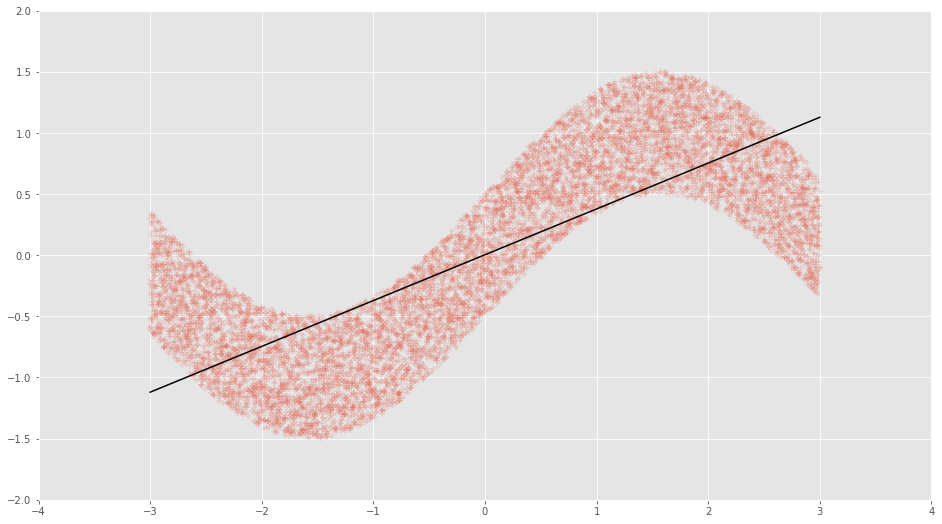

In [13]:
fig, ax = plt.subplots(1, 1);
ax.scatter(xs, ys, alpha = 0.15, marker='+');
ax.set_xlim([-4, 4]);
ax.set_ylim([-2, 2]);
ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations);

In [14]:
def train(X, Y, preds, n_iterations = 100, batch_size = 200, eta = 0.02):
    cost = tf.reduce_mean(distance(preds, Y))
    optimizer = tf.train.GradientDescentOptimizer(eta).minimize(cost)
    
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha = 0.15)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-1.7, 1.7])
    
    with tf.Session() as s:
        s.run(tf.global_variables_initializer())
        
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size : 
                              (batch_i + 1) * batch_size]
                s.run(optimizer, feed_dict = { X: xs[idxs_i], 
                                               Y: ys[idxs_i] })
            
            training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
            
            if it_i % 10 == 0:
                ys_pred = preds.eval(feed_dict = { X: xs }, session = s)
                #ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations)
                print(training_cost)
    #fig.show();
    #plt.draw();
    ax.plot(xs, ys_pred, 'k')

In [15]:
preds = tf.Variable(tf.random_normal([1]), name = 'bias')

for pow_i in range(0, 4):
    W = tf.Variable(tf.random_normal([1], stddev = 0.1), 
                    name = 'W_%d' %pow_i)
    preds = tf.add(tf.multiply(tf.pow(X, pow_i), W), preds)

0.707092
0.256181
0.250543
0.251115
0.250833
0.254465
0.251006
0.252604
0.249674
0.250374


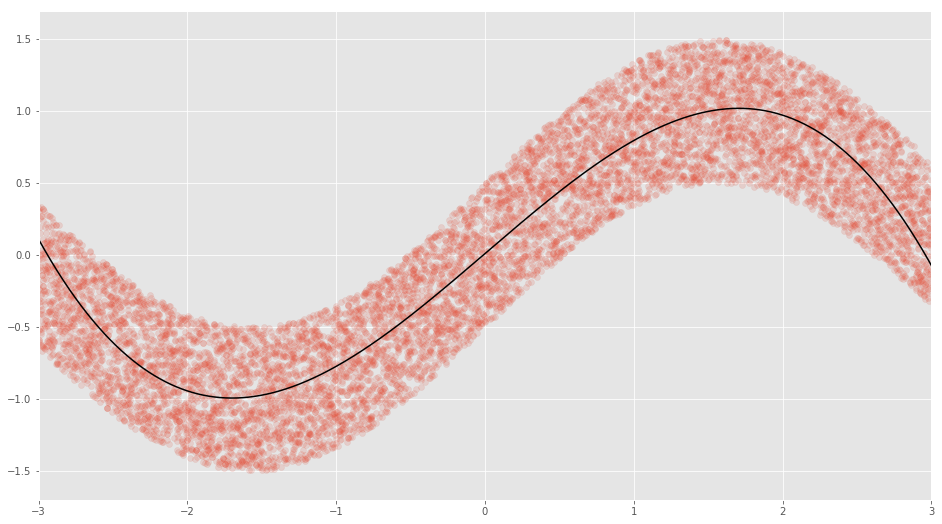

In [16]:
train(X, Y, preds, eta = 0.005)

In [17]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'W')
b = tf.Variable(tf.constant(0, dtype = tf.float32, shape = [n_neurons]), 
                name = 'b')
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')

In [18]:
preds = tf.reduce_sum(h, 1)

0.307851
0.285008
0.28149
0.279483
0.278249
0.277334
0.276631
0.276073
0.2756
0.275172


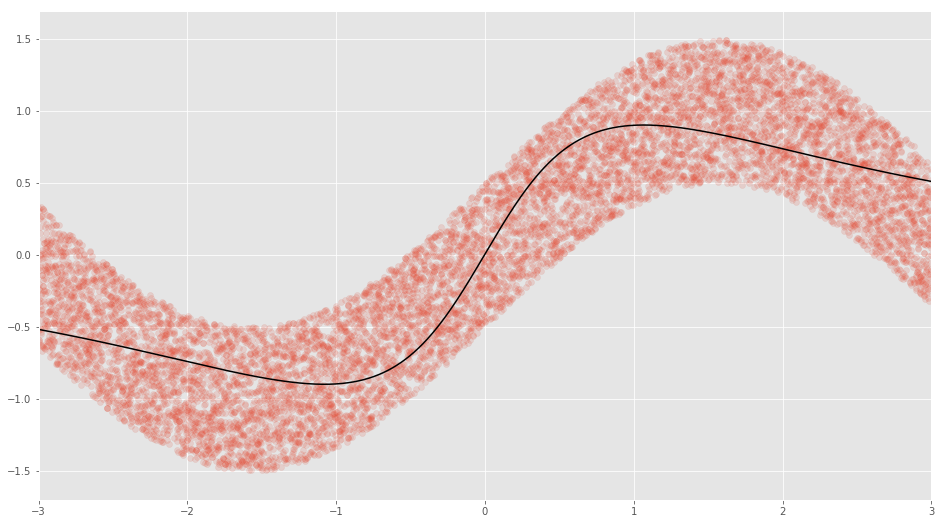

In [19]:
train(X, Y, preds, eta = 0.001)

In [20]:
def linear(X, n_input, n_output, activation  = None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev = 0.1), 
                    name = 'W')
    b = tf.Variable(tf.constant(0, dtype = tf.float32, shape = [n_output]), 
                    name = 'b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name = 'h')
    return h

In [21]:
ops.reset_default_graph()
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

[]

In [22]:
X = tf.placeholder(tf.float32, name = 'X')
h = linear(X, 2, 10)
[op.name for op in g.get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

In [23]:
# Redo with name scopes
def linear(X, n_input, n_output, activation = None, scope = None):
    with tf.variable_scope(scope or 'linear'):
        W = tf.get_variable(
            name = 'W', 
            shape = [n_input, n_output],
            initializer = tf.random_normal_initializer(mean = 0.0, 
                                                       stddev = 0.1))
        b = tf.get_variable(
            name = 'b', 
            shape = [n_output], initializer = tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [24]:
ops.reset_default_graph()
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

[]

In [25]:
X = tf.placeholder(tf.float32, name = 'X')
h = linear(X, 2, 10, scope = 'layer1')

In [26]:
[op.name for op in g.get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [27]:
h2 = linear(h, 10, 10, scope = 'layer2')
h3 = linear(h2, 10, 3, scope = 'layer3')

In [28]:
[op.name for op in g.get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

In [29]:
!ls ../../../../scripts-analytics/faces/images/blends/

analytics.jpg
apps.jpg
bend.jpg
content.jpg
design.jpg
dev.jpg
devops.jpg
executive.jpg
experience.jpg
finance.jpg
hr.jpg
it_legal.jpg
marketing.jpg
medford.jpg
ny.jpg
qa.jpg
remote.jpg
sales.jpg
sprint1.jpg
sprint2.jpg
sprint3.jpg
stragglers (nugget love + employee engagement).jpg
support.jpg
team_training.jpg
trainers.jpg


In [30]:
img = plt.imread('../../../../scripts-analytics/faces/images/blends/analytics.jpg')

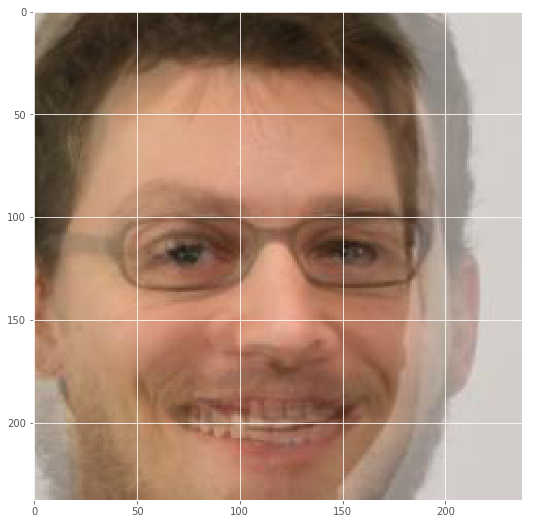

In [31]:
#img = imresize(astronaut(), (256, 256))
plt.imshow(img);

In [32]:
xs = [] # pixel locations
ys = [] # color at each pixel

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        xs.append([i, j])
        ys.append(img[i, j])

In [33]:
xs = np.array(xs)
ys = np.array(ys)
# normalize
xs = (xs - np.mean(xs)) / np.std(xs)

xpred = []
for i in range(-5, img.shape[0] + 6):
    for j in range(-5, img.shape[1] + 6):
        xpred.append([i, j])

In [34]:
len(xpred)

62001

In [35]:
xs.shape, ys.shape, img.shape

((56644, 2), (56644, 3), (238, 238, 3))

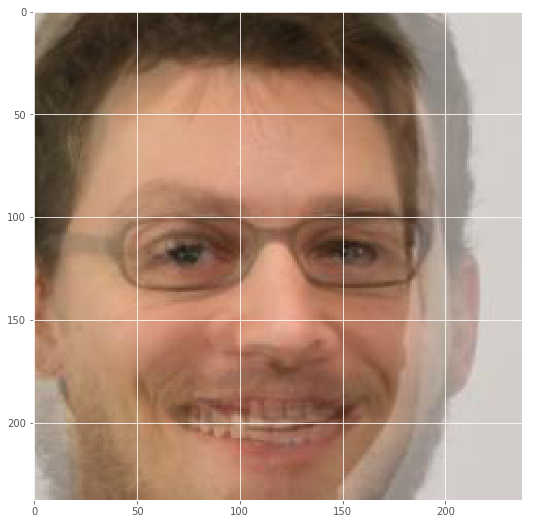

In [36]:
plt.imshow(ys.reshape(img.shape));

In [37]:
ops.reset_default_graph()
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

[]

In [38]:
X = tf.placeholder(tf.float32, shape = [None, 2], name = 'X')
Y = tf.placeholder(tf.float32, shape = [None, 3], name = 'Y')

In [39]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3] # per layer
current_input = X

for layer in range(1, len(n_neurons)):
    current_input = linear(
        X = current_input, 
        n_input = n_neurons[layer - 1],
        n_output = n_neurons[layer],
        activation = tf.nn.relu if (layer + 1) < len(n_neurons) else None,
        scope = 'layer' + str(layer))

In [40]:
Y_pred = current_input

In [41]:
cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))

In [42]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Iteration   0 Cost: 72.55920
Iteration   1 Cost: 59.61031
Iteration   2 Cost: 45.60436
Iteration   4 Cost: 37.80611
Iteration   8 Cost: 27.08055
Iteration  16 Cost: 26.41543
Iteration  32 Cost: 19.01540
Iteration  64 Cost: 17.73087
Iteration 125 Cost: 13.73177
Iteration 250 Cost: 11.08255
Iteration 499 Cost: 9.61106


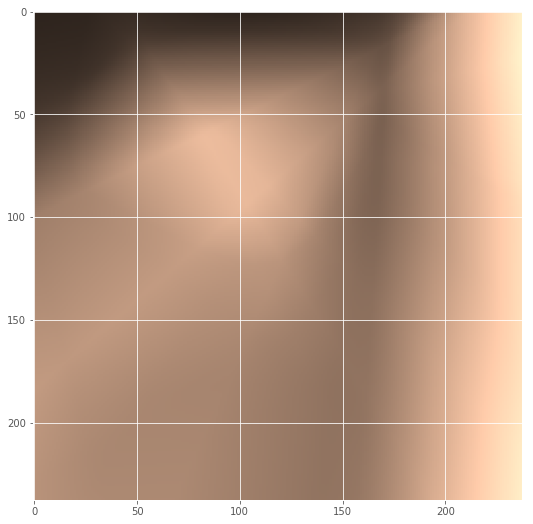

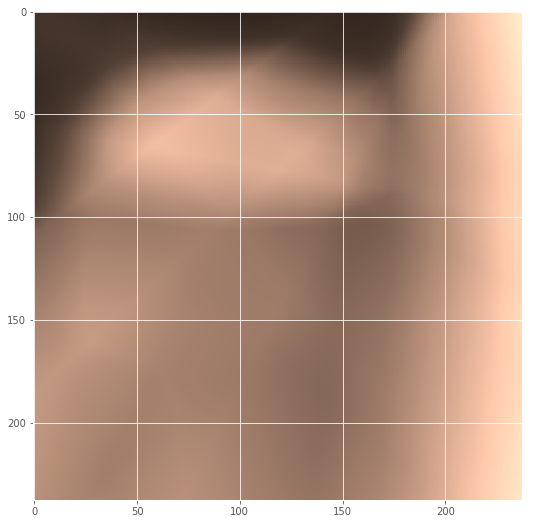

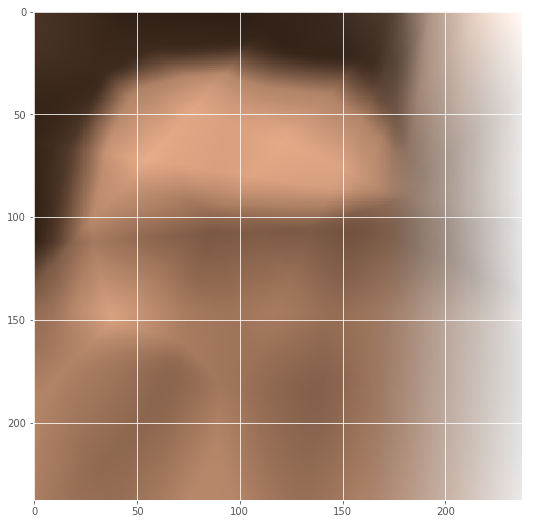

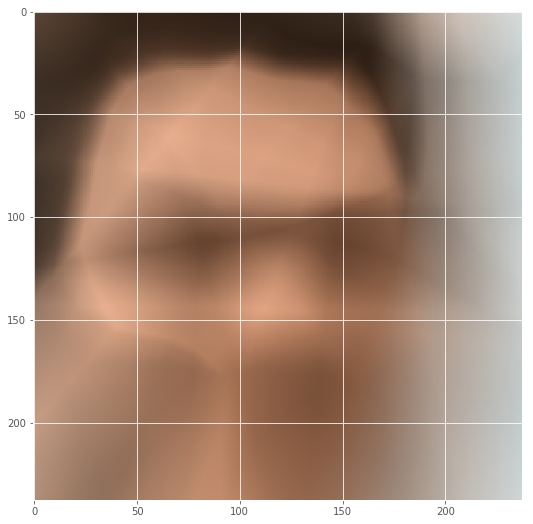

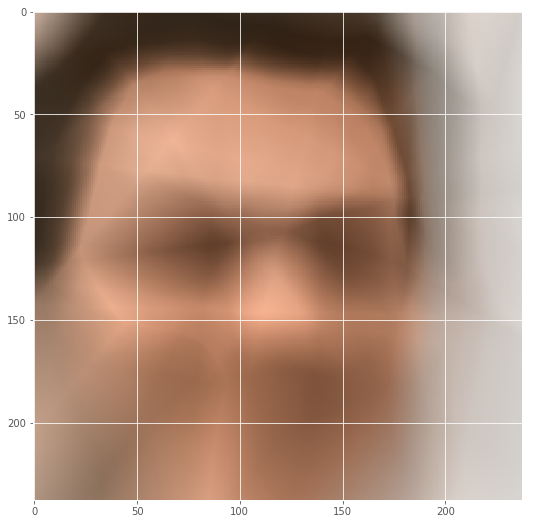

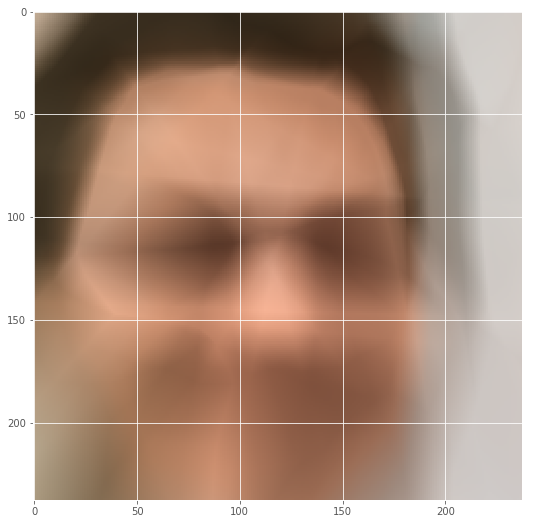

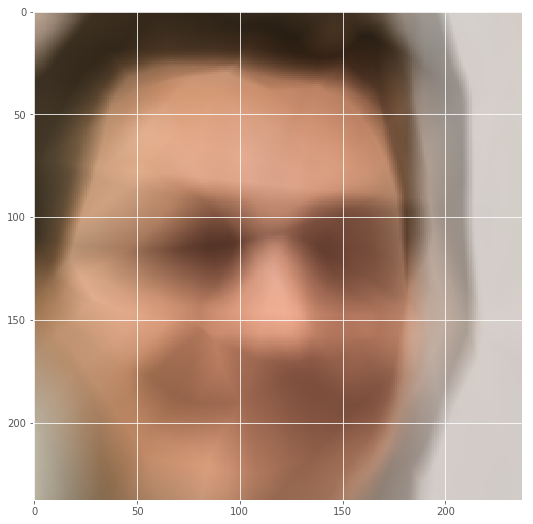

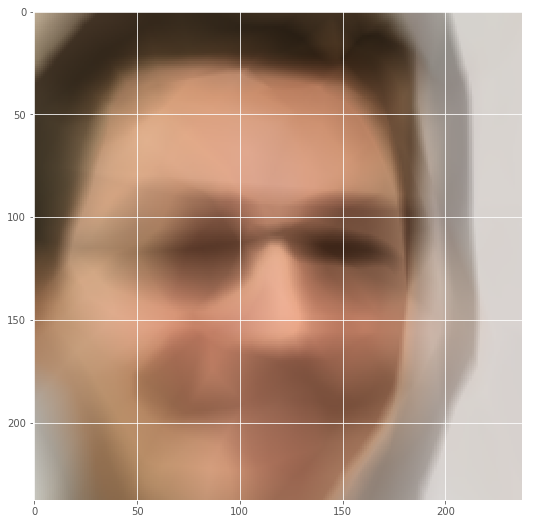

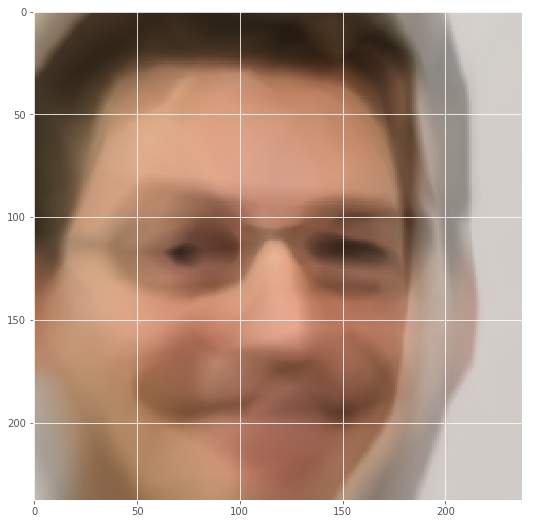

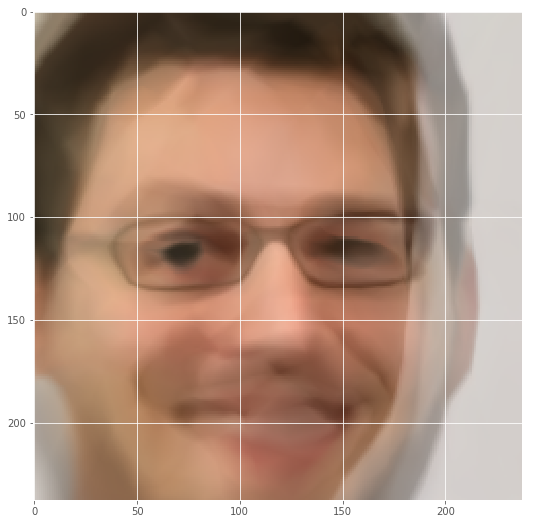

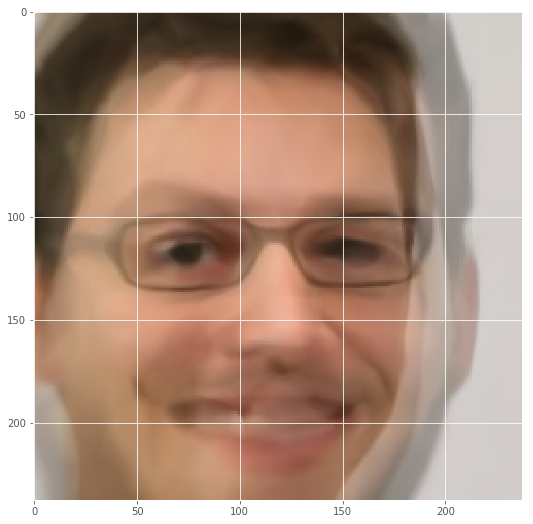

In [43]:
n_iterations = 500
batch_size = 50

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    prev_training_cost = 0.
    
    for i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch in range(n_batches):
            idx = idxs[batch * batch_size : (batch + 1) * batch_size]
            s.run(optimizer, feed_dict = { X: xs[idx], Y: ys[idx] })
            
        training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
        
        if i in [0, 1, 2, 4, 8, 16, 32, 64, 125, 250, 499]:
            print('Iteration %3d Cost: %.5f' %(i, training_cost))
            ys_pred = Y_pred.eval(feed_dict = { #X: xpred 
                                                X: xs },
                                  session = s)
            plt.figure();
            img = np.clip(
                #ys_pred.reshape([75, 75, 3]), 0, 255)\
                ys_pred.reshape(img.shape), 0, 255)\
                .astype(np.uint8)
            plt.imshow(img);